In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os

### Prepara il dataset
* Converti file csv in un'istanza di `pandas.DataFrame()`
* Usa l'id dell'annuncio come indice di ogni riga
* Usa prezzo, locali, superficie e bagni come indice di ogni colonna
* Rimuovi le righe in cui sono presenti valori nulli

In [3]:
PATH_TO_REPOSITORY = "/home/simone/MachineLearning/Experimental"
INPUT = os.path.join(PATH_TO_REPOSITORY, "ml-tests/data/analytics.csv")
#converti csv in pandas dataframe usando id come indice di riga
#e prezzo, locali, superficie e bagni come indice di colonna
data = pd.read_csv(INPUT, index_col='pagina', usecols=["pagina", "visualizzazioni_tot",
                                                       "visualizzazioni_uniche", "tempo_medio",
                                                       "accessi", "rimbalzo", "per_uscita"])
#rimuovi le righe che contengono valori nulli (NaN)
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [4]:
#Mostra i primi 5 valori nel dataframe
print(data.head())
#Mostra la dimensione del dataframe
print(f"\nDataframe dimensions: {data.shape}")

                    visualizzazioni_tot  visualizzazioni_uniche  tempo_medio  \
pagina                                                                         
/                                 32384                   11759           32   
/viewforum.php?f=3                 6371                    2927           25   
/viewforum.php?f=2                 5577                    2363           23   
/index.php                         3529                    1776           40   
/viewforum.php?f=9                 3406                    1550           16   

                    accessi  rimbalzo  per_uscita  
pagina                                             
/                      9711    1041.0      1228.0  
/viewforum.php?f=3      799    2716.0       940.0  
/viewforum.php?f=2      132    1212.0       350.0  
/index.php              317    1514.0       918.0  
/viewforum.php?f=9       73    2192.0       370.0  

Dataframe dimensions: (500, 6)


### Standardizzazione dei dati
Prima di applicare l'algoritmo PCA bisogna standardizzare i dati.  
Ciò vuol dire che bisogna centrarli e scalarli in modo che le unità di misura differenti non influiscono nell'algoritmo.  
Dopo la standardizzazione il valore medio di ogni riga sarà 0 e la deviazione standard per i valori di ogni casa sarà 1.

In [5]:
scaled_data = preprocessing.scale(data.T)

### Applica l'algoritmo di Principal Component Analysis ai dati standardizzati
* model-fitting
* applica la riduzione delle dimensioni (transform)

In [6]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

### SCREE PLOT
Lo scree plot serve a capire quanto contribuisce ognuno dei principal component alla percentuale di varianza

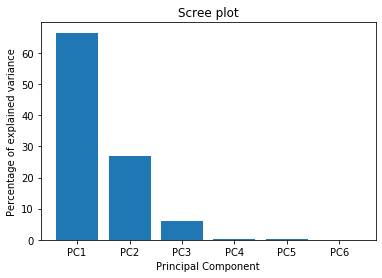

In [7]:
#varianza in percentuale per il plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#crea le label del grafico
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
#crea grafico a barre
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
#imposta i nomi degli assi
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Component")
#titolo
plt.title("Scree plot")
#infine mostra il grafico
plt.show()

### SCATTER PLOT
Inserire le nuove coordinate create da pca transform in una matrice dove le righe hanno le label dei sample e le colonne hanno le label dei Principal Components

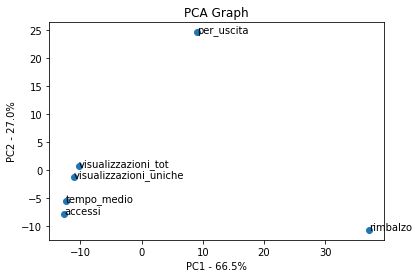

In [9]:
pca_df = pd.DataFrame(pca_data, index=["visualizzazioni_tot",
                                                       "visualizzazioni_uniche", "tempo_medio",
                                                       "accessi", "rimbalzo", "per_uscita"], columns = labels)
#scatter plot
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
#add sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()